<a href="https://colab.research.google.com/github/Shubhamdiwakarkadam/Data-Analyst-Intern---Unified-Mentor-Private-Limited-/blob/main/Amazon_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
data =  pd.read_csv('/content/Amazon Sales data.csv')
data.head()

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None


In [24]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [25]:
#checking the shape
data.shape

(100, 14)

Sales Trend Analysis


In [26]:
#Extract date from data

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Date']

0    2010-05-28
1    2012-08-22
2    2014-05-02
3    2014-06-20
4    2013-02-01
        ...    
95   2011-07-26
96   2011-11-11
97   2016-06-01
98   2015-07-30
99   2012-02-10
Name: Order Date, Length: 100, dtype: datetime64[ns]

In [27]:
#extract year and month from "order date"

data['Order Year'] =  data['Order Date'].dt.year
data['Order Month'] =  data['Order Date'].dt.month

print('Datetime conversion and extraction completed.')

print(data.head())

Datetime conversion and extraction completed.
                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H 2010-05-28  669165933  6/27/2010        9925   
1        Online              C 2012-08-22  963881480  9/15/2012        2804   
2       Offline              L 2014-05-02  341417157   5/8/2014        1779   
3        Online              C 2014-06-20  514321792   7/5/2014        8102   
4       Offline              L 2013-02-01  115456712   2/6/2013        5062   

In [28]:
data['Order Year']

0     2010
1     2012
2     2014
3     2014
4     2013
      ... 
95    2011
96    2011
97    2016
98    2015
99    2012
Name: Order Year, Length: 100, dtype: int32

In [29]:
data['Order Month']

0      5
1      8
2      5
3      6
4      2
      ..
95     7
96    11
97     6
98     7
99     2
Name: Order Month, Length: 100, dtype: int32

In [30]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


Analyzing the sales trends month-wise, year-wise, and yearly month-wise

1. Monthly Sales Trend:

In [31]:
Sales_Trends = data[['Order Date','Order Year', 'Order Month', 'Sales Channel']]

In [32]:
Sales_Trends.head(20)

,Order Date,Order Year,Order Month,Sales Channel
0,2010-05-28,2010,5,Offline
1,2012-08-22,2012,8,Online
2,2014-05-02,2014,5,Offline
3,2014-06-20,2014,6,Online
4,2013-02-01,2013,2,Offline
5,2015-02-04,2015,2,Online
6,2011-04-23,2011,4,Offline
7,2012-07-17,2012,7,Online
8,2015-07-14,2015,7,Offline
9,2014-04-18,2014,4,Online


In [33]:
#group by year and month to get the sales trends
print('calculating sales trends...')

#month-wise sales trend
monthly_sales = data.groupby('Order Month')['Total Revenue'].sum().reset_index()

print('MonthlySales Trend .')

print(monthly_sales)

calculating sales trends...
MonthlySales Trend .
    Order Month  Total Revenue
0             1    10482467.12
1             2    24740517.77
2             3     2274823.87
3             4    16187186.33
4             5    13215739.99
5             6     5230325.77
6             7    15669518.50
7             8     1128164.91
8             9     5314762.56
9            10    15287576.61
10           11    20568222.76
11           12     7249462.12


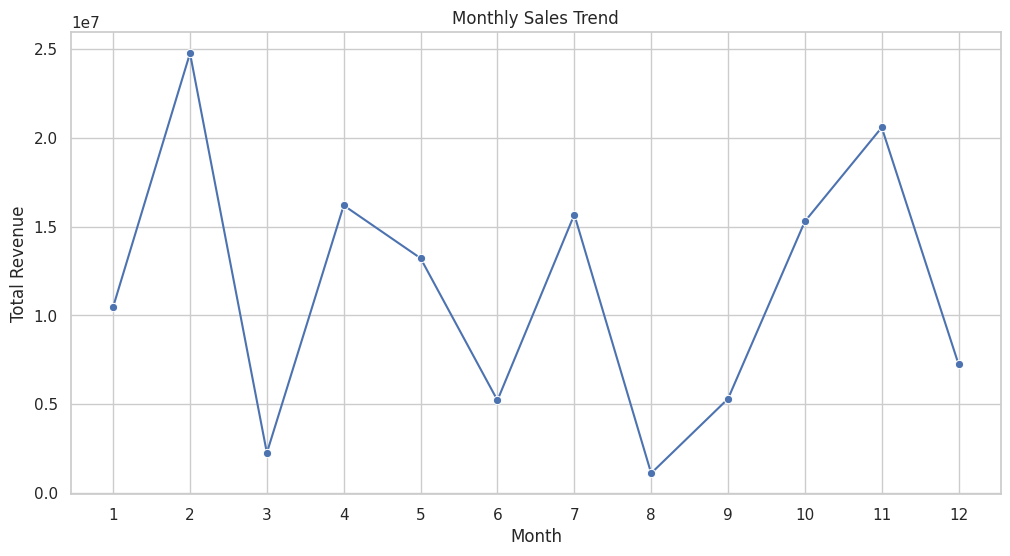

In [34]:
#set the style of visualization
sns.set(style='whitegrid')

#plot Monthly Sales Trend

plt.figure(figsize=(12, 6))
sns. lineplot(data=monthly_sales, x='Order Month', y ='Total Revenue', marker='o' )
plt. title("Monthly Sales Trend" )
plt.xlabel("Month" )
plt.ylabel('Total Revenue')
plt.xticks(monthly_sales['Order Month' ])
plt. grid(True)
plt.show()


2. Yearly Sales Trend:

In [35]:
# Group by year and month to get the sales trends
print( 'Calculating sales trends..')
# Year-wise sales trend
yearly_sales = data.groupby('Order Year') ['Total Revenue']. sum().reset_index()
print( 'Yearly Sales Trend:')
print(yearly_sales)

Calculating sales trends..
Yearly Sales Trend:
   Order Year  Total Revenue
0        2010    19186024.92
1        2011    11129166.07
2        2012    31898644.52
3        2013    20330448.66
4        2014    16630214.43
5        2015    12427982.86
6        2016    12372867.22
7        2017    13373419.63


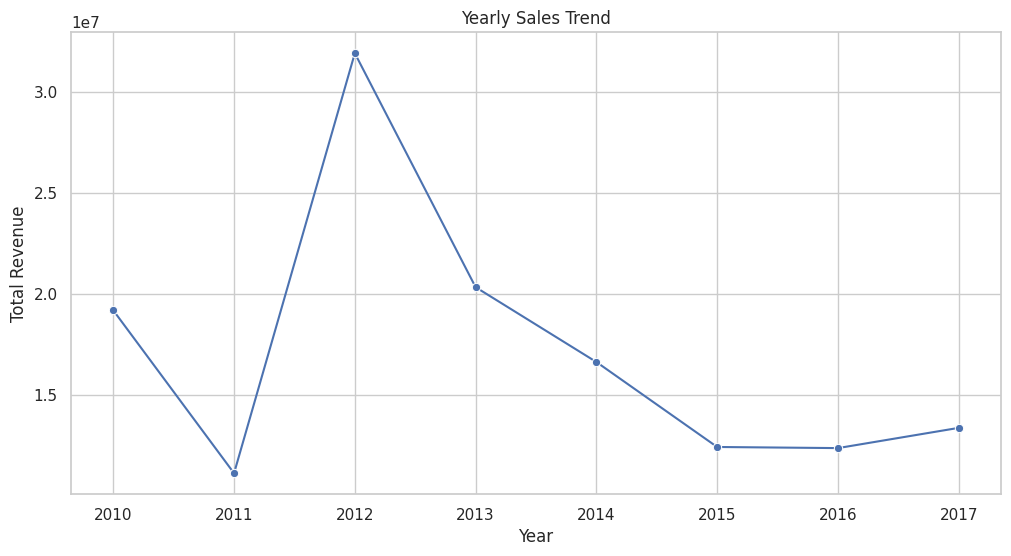

In [36]:
# Plot Yearly Sales Trend
plt.figure(figsize=(12, 6))
sns. lineplot(data=yearly_sales, x='Order Year', y='Total Revenue', marker='o')
plt. title('Yearly Sales Trend' )
plt.xlabel( 'Year')
plt.ylabel( 'Total Revenue' )
plt.xticks(yearly_sales['Order Year'])
plt. grid(True)
plt.show()

3. Yearly Monthly Sales Trend

In [37]:
#group by year and month to get the sales trend
print('calculating sales trends....')

#yearly month_wise sales trend
yearly_monthly_sales = data.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().reset_index()

print('yearly monthly sales trend')
print(yearly_monthly_sales)

calculating sales trends....
yearly monthly sales trend
    Order Year  Order Month  Total Revenue
0         2010            2     3410661.12
1         2010            5     2587973.26
2         2010            6     1082418.40
3         2010           10     6064933.75
4         2010           11     3458252.00
5         2010           12     2581786.39
6         2011            1     1042225.35
7         2011            2      387002.20
8         2011            4     2798046.49
9         2011            5      272410.45
10        2011            6       19103.44
11        2011            7       97040.64
12        2011            9      574951.92
13        2011           11     5938385.58
14        2012            1     1012884.00
15        2012            2     6707849.42
16        2012            3      994765.42
17        2012            4     4556012.38
18        2012            5     3782781.82
19        2012            6     2132075.27
20        2012            7     4445093.9

<function matplotlib.pyplot.show(close=None, block=None)>

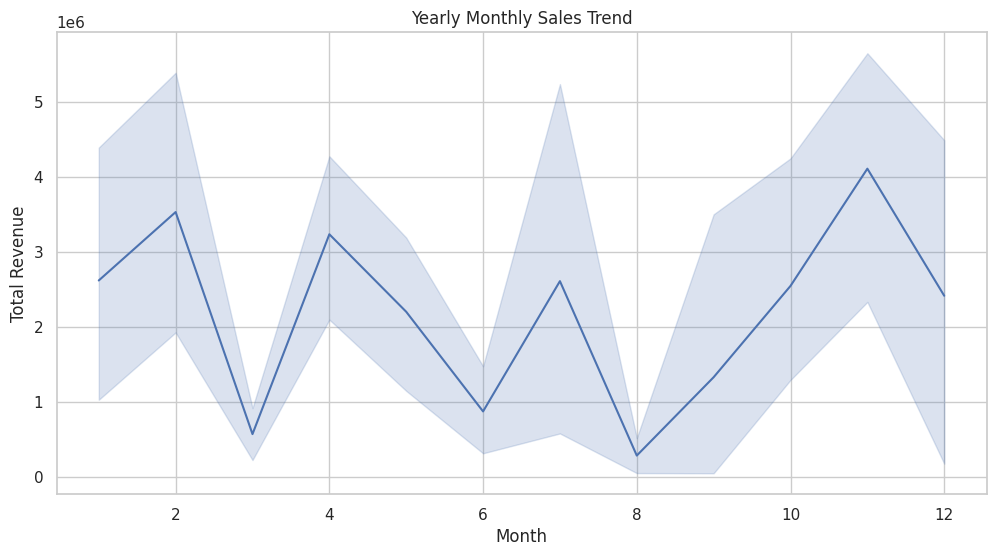

In [38]:
# Plot Yearly Monthly Sales Trend
plt. figure(figsize=(12, 6))
sns.lineplot (data=yearly_monthly_sales, x='Order Month', y='Total Revenue')
plt.title('Yearly Monthly Sales Trend' )
plt. xlabel( 'Month' )
plt.ylabel('Total Revenue')
plt. grid (True)
plt. show


In [43]:
correlation_matrix = data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']]
print(correlation_matrix)

    Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit
0         9925      255.28     159.42     2533654.00  1582243.50     951410.50
1         2804      205.70     117.11      576782.80   328376.44     248406.36
2         1779      651.21     524.96     1158502.59   933903.84     224598.75
3         8102        9.33       6.92       75591.66    56065.84      19525.82
4         5062      651.21     524.96     3296425.02  2657347.52     639077.50
..         ...         ...        ...            ...         ...           ...
95         888      109.28      35.84       97040.64    31825.92      65214.72
96        6267        9.33       6.92       58471.11    43367.64      15103.47
97        1485      154.06      90.93      228779.10   135031.05      93748.05
98        5767       81.73      56.67      471336.91   326815.89     144521.02
99        5367      668.27     502.54     3586605.09  2697132.18     889472.91

[100 rows x 6 columns]


In [46]:
# Calculate key metrics
key_metrics = {
'Total Revenue': data[ 'Total Revenue']. sum(),
'Total Cost': data[ 'Total Cost'].sum(),
'Total Profit': data[ 'Total Profit'].sum(),
'Average Unit Price': data[ 'Unit Price' ] .mean(),
'Average Unit Cost': data[ 'Unit Cost']. mean(),
'Total Units Sold': data[ 'Units Sold']. sum()
}
key_metrics

{'Total Revenue': 137348768.31,
 'Total Cost': 93180569.91000001,
 'Total Profit': 44168198.39999999,
 'Average Unit Price': 276.7613,
 'Average Unit Cost': 191.048,
 'Total Units Sold': 512871}

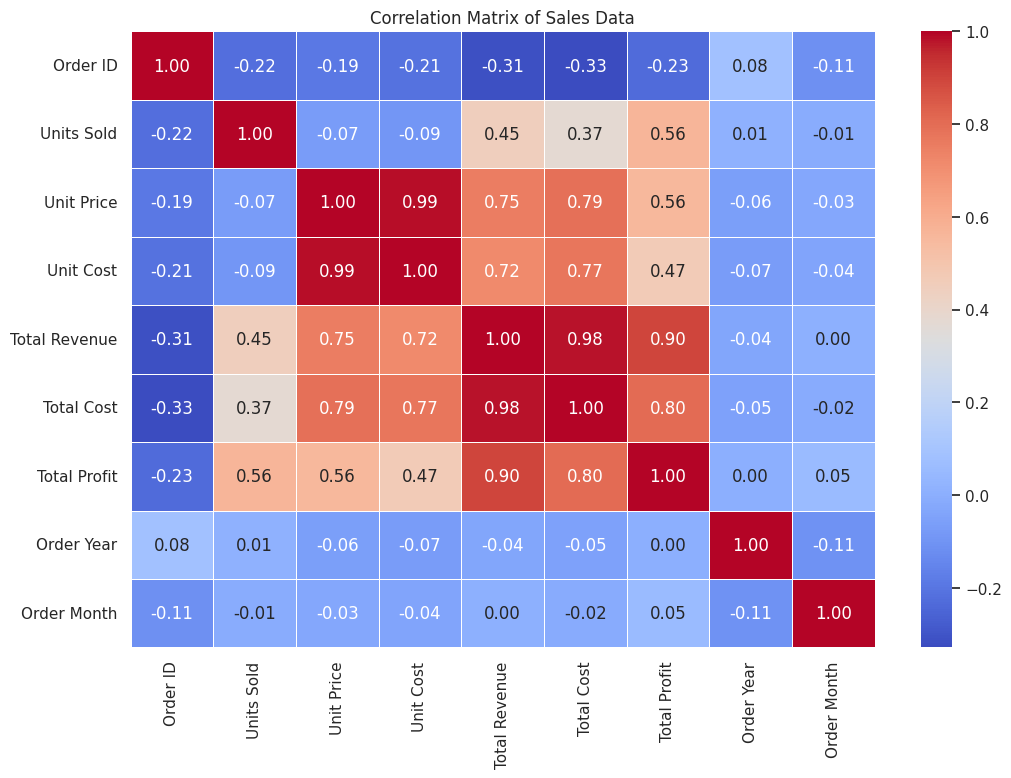

In [48]:
# Select only numeric columns for correlation matrix
numeric_df = data. select_dtypes (include=[np.number])
# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
# Plot correlation matrix
plt. figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt. title('Correlation Matrix of Sales Data' )
plt.show()

## **Visualize the relationships between attribute**
**We will create the following plots:**
• A scatter plot of Units sold and Total Revenue, Unit pric and Total revenue, Unit price
and total profit
• A count plot of Item Type and channels

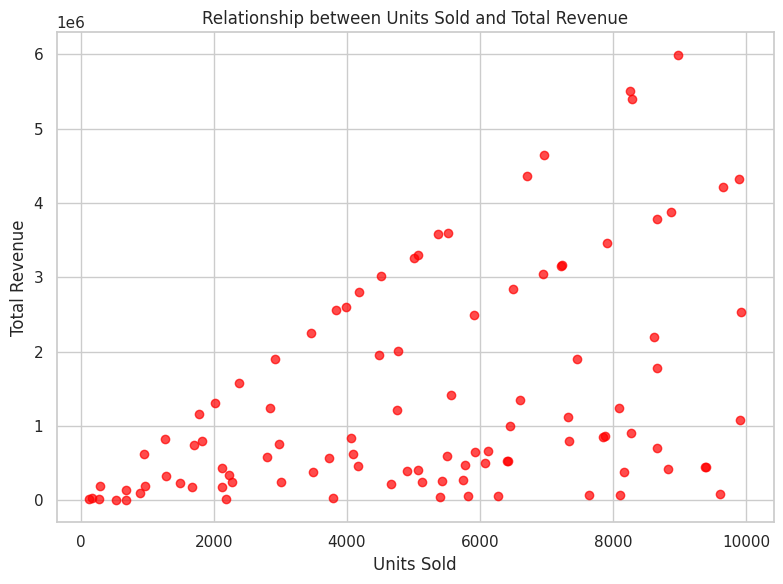

In [51]:
# Relationship between Units sold and Total Revenue
plt. figure(figsize=(8, 6))
plt.scatter(data['Units Sold'], data[ 'Total Revenue'], color='red', alpha=0.7)
plt.xlabel('Units Sold')
plt.ylabel( 'Total Revenue' )
plt.title('Relationship between Units Sold and Total Revenue')
plt.grid(True)
plt.tight_layout ()
plt. show()

# OBSERVATION
• WE OBSERVE THAT THERE IS A RELATIONSHIP BETWEEN UNITS SOLD AND TOTAL
REVENUE
• AS UNIT SALES INCREASES, REVENUE ALSO INCREASES

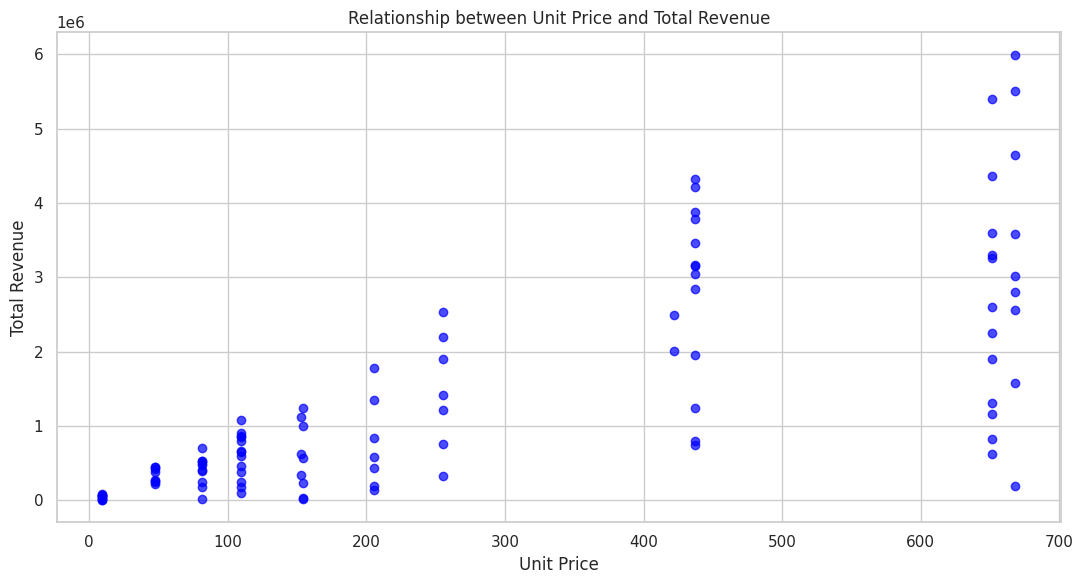

In [55]:
# Relationship between Unit price and Total Revenue
plt. figure(figsize = (11,6))
plt.scatter(data['Unit Price'], data[ 'Total Revenue'], color='blue', alpha=0.7)
plt.title('Relationship between Unit Price and Total Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue' )
plt.grid(True)
plt. tight_layout()
plt. show()

# OBSERVATION
• We observe that there is a relationship between unit price and total revenue
• As per the observation higher unit prices lead to higher total revenue.

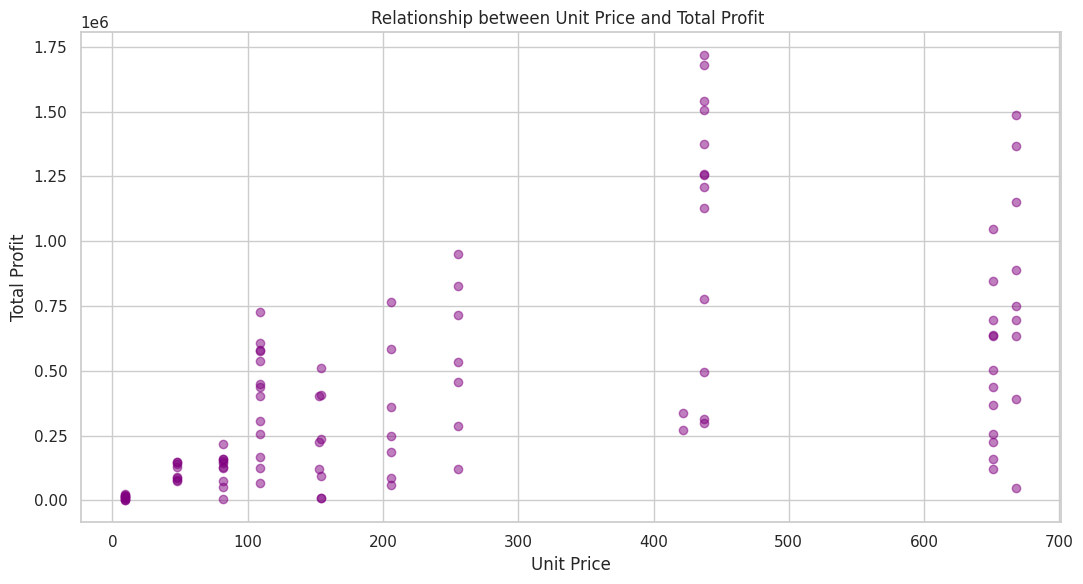

In [56]:
# Relationship between Unit Price and Total Profit
plt. figure(figsize = (11,6))
plt. scatter (data[ 'Unit Price'], data[ 'Total Profit'], color = 'purple', alpha =0.5)
plt.title("Relationship between Unit Price and Total Profit ")
plt.xlabel('Unit Price')
plt.ylabel('Total Profit' )
plt.grid(True)
plt.tight_layout ()
plt. show()

# Observations
• We observe that there is relationship between Unit Price and total profit
• As per the observation unit price increases, the profit also increase
• The profit is maximun between 400 and 500 unit price

<ipython-input-63-bd604f617b9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data ,x = 'Item Type', edgecolor = 'linen', alpha = 0.7, palette = colors)


<function matplotlib.pyplot.show(close=None, block=None)>

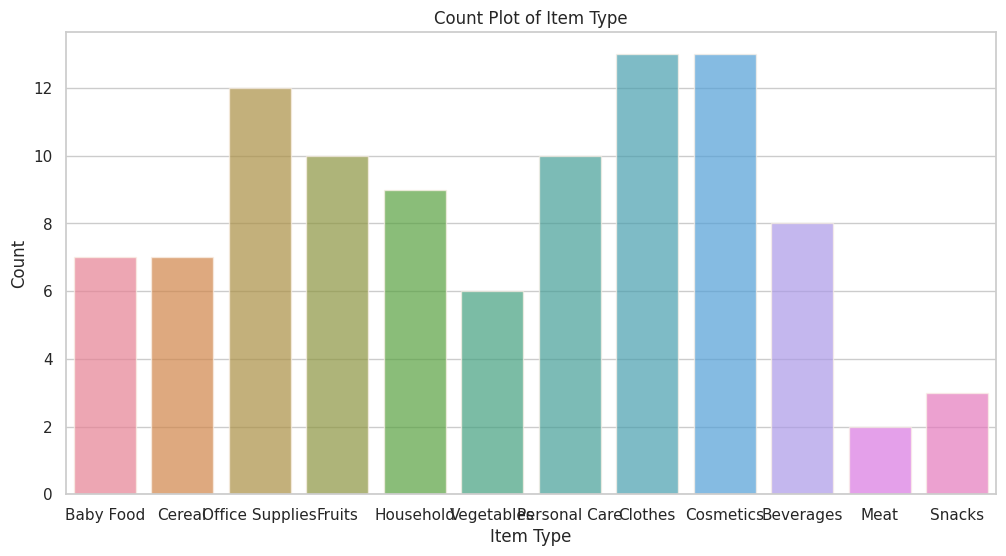

In [63]:
# Count plot of the "Item Type" feature
plt. figure(figsize=(12, 6))
colors= sns.color_palette('husl', len(data['Item Type'].unique()))
sns.countplot(data = data ,x = 'Item Type', edgecolor = 'linen', alpha = 0.7, palette = colors)

plt. title("Count Plot of Item Type")
plt. xlabel('Item Type')
plt. ylabel( 'Count' )
plt.show

# OBSERVATION:
We see that most customers choose clothes or cosmetics, having maximum purchases

<ipython-input-64-efe5ab76b40d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'Sales Channel', edgecolor = 'linen', alpha = 0.7, palette = colors)


Text(0, 0.5, 'Count')

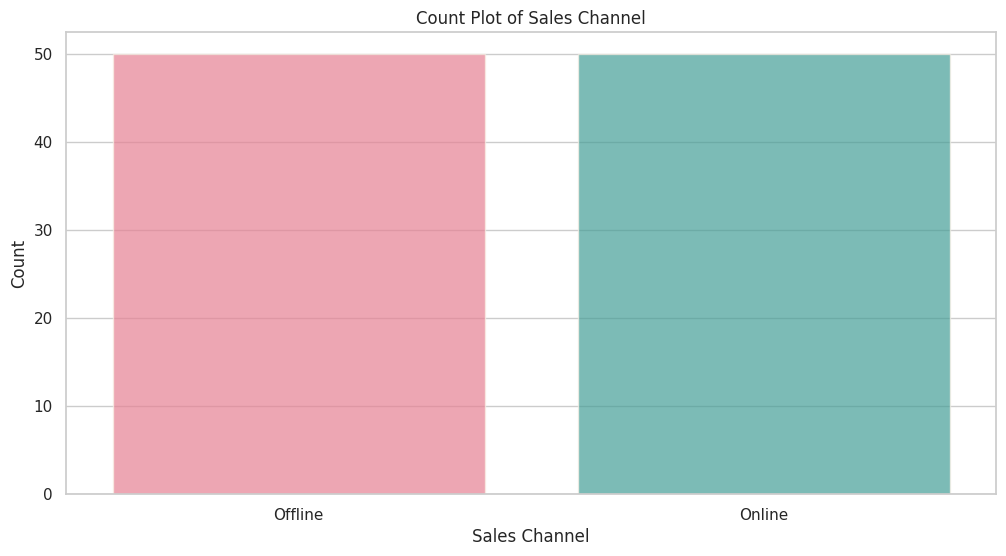

In [64]:
# Count plot of channel
plt.figure(figsize=(12, 6))
colors= sns.color_palette('husl', len(data['Sales Channel'].unique()))

sns.countplot(data = data, x = 'Sales Channel', edgecolor = 'linen', alpha = 0.7, palette = colors)
plt.title('Count Plot of Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')

# OBSERVATION
WE HAVE SEEN THAT OFFLINE AND ONLINE BOTH ARE EQUALLY DISTRIBUTED
# CONCLUSION:
The analysis of total revenue by region
highlights the importance of
understanding regional variations in
economic activity and market dynamics
for businesses aiming to achieve global
or regional growth.